# sentiment analysis
Reading the mood from text with machine learning 
## Choosing a Data Set
Go ahead and download the data set from the Sentiment Labelled Sentences Data Set from the UCI Machine Learning Repository.

By the way, this repository is a wonderful source for machine learning data sets when you want to try out some algorithms. This data set includes labeled reviews from IMDb, Amazon, and Yelp. Each review is marked with a score of 0 for a negative sentiment or 1 for a positive sentiment.

Extract the folder into a data folder and go ahead and load the data with Pandas:

In [1]:
import pandas as pd
#https://realpython.com/python-keras-text-classification/#choosing-a-data-set
filepath_dict = {'yelp':
                 'C:/Users/rzouga/Downloads/Github/NLP/sentimentlabelledsentences/sentimentlabelledsentences/yelp_labelled.txt',
                 'amazon':
                 'C:/Users/rzouga/Downloads/Github/NLP/sentimentlabelledsentences/sentimentlabelledsentences/amazon_cells_labelled.txt',
                 'imdb':  
                 'C:/Users/rzouga/Downloads/Github/NLP/sentimentlabelledsentences/sentimentlabelledsentences/imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


This looks about right. With this data set, you are able to train a model to predict the sentiment of a sentence. Take a quick moment to think about how you would go about predicting the data.

One way you could do this is to count the frequency of each word in each sentence and tie this count back to the entire set of words in the data set. You would start by taking the data and creating a vocabulary from all the words in all sentences. The collection of texts is also called a corpus in NLP.

The vocabulary in this case is a list of words that occurred in our text where each word has its own index. This enables you to create a vector for a sentence. You would then take the sentence you want to vectorize, and you count each occurrence in the vocabulary. The resulting vector will be with the length of the vocabulary and a count for each word in the vocabulary. 
The resulting vector is also called a feature vector. In a feature vector, each dimension can be a numeric or categorical feature, like for example the height of a building, the price of a stock, or, in our case, the count of a word in a vocabulary. These feature vectors are a crucial piece in data science and machine learning, as the model you want to train depends on them.

Let’s quickly illustrate this. Imagine you have the following two sentences:

In [2]:
>>> sentences = ['John likes ice cream', 'John hates chocolate.']

Next, you can use the CountVectorizer provided by the scikit-learn library to vectorize sentences. It takes the words of each sentence and creates a vocabulary of all the unique words in the sentences. This vocabulary can then be used to create a feature vector of the count of the words:

In [3]:
>>> from sklearn.feature_extraction.text import CountVectorizer

>>> vectorizer = CountVectorizer(min_df=0, lowercase=False)
>>> vectorizer.fit(sentences)
>>> vectorizer.vocabulary_

{'John': 0, 'likes': 5, 'ice': 4, 'cream': 2, 'hates': 3, 'chocolate': 1}

This vocabulary serves also as an index of each word. Now, you can take each sentence and get the word occurrences of the words based on the previous vocabulary. The vocabulary consists of all five words in our sentences, each representing one word in the vocabulary. When you take the previous two sentences and transform them with the CountVectorizer you will get a vector representing the count of each word of the sentence:

In [4]:
>>> vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]], dtype=int64)

Now, you can see the resulting feature vectors for each sentence based on the previous vocabulary. For example, if you take a look at the first item, you can see that both vectors have a 1 there. This means that both sentences have one occurrence of John, which is in the first place in the vocabulary.

This is considered a Bag-of-words (BOW) model, which is a common way in NLP to create vectors out of text. Each document is represented as a vector. You can use these vectors now as feature vectors for a machine learning model. This leads us to our next part, defining a baseline model.

In [5]:
# other way to solve it 
from keras.preprocessing.text import Tokenizer

sentence = ["John likes to watch movies. Mary likes movies too."]

def print_bow(sentence: str) -> None:
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentence)
    sequences = tokenizer.texts_to_sequences(sentence)
    word_index = tokenizer.word_index 
    bow = {}
    for key in word_index:
        bow[key] = sequences[0].count(word_index[key])
    print(bow)
    print(f"Bag of word sentence 1 :\n{bow}")
    print(f'We found {len(word_index)} unique tokens.')

print_bow(sentence)

Using TensorFlow backend.


{'likes': 2, 'movies': 2, 'john': 1, 'to': 1, 'watch': 1, 'mary': 1, 'too': 1}
Bag of word sentence 1 :
{'likes': 2, 'movies': 2, 'john': 1, 'to': 1, 'watch': 1, 'mary': 1, 'too': 1}
We found 7 unique tokens.


# Defining a Baseline Model

When you work with machine learning, one important step is to define a baseline model. This usually involves a simple model, which is then used as a comparison with the more advanced models that you want to test. In this case, you’ll use the baseline model to compare it to the more advanced methods involving (deep) neural networks, the meat and potatoes of this tutorial.

First, you are going to split the data into a training and testing set which will allow you to evaluate the accuracy and see if your model generalizes well. This means whether the model is able to perform well on data it has not seen before. This is a way to see if the model is overfitting.

Overfitting is when a model is trained too well on the training data. You want to avoid overfitting, as this would mean that the model mostly just memorized the training data. This would account for a large accuracy with the training data but a low accuracy in the testing data.

We start by taking the Yelp data set which we extract from our concatenated data set. From there, we take the sentences and labels. The .values returns a NumPy array instead of a Pandas Series object which is in this context easier to work with:

In [6]:
>>> from sklearn.model_selection import train_test_split

>>> df_yelp = df[df['source'] == 'yelp']

>>> sentences = df_yelp['sentence'].values
>>> y = df_yelp['label'].values

>>> sentences_train, sentences_test, y_train, y_test = train_test_split( sentences, y, test_size=0.25, random_state=1000)

Here we will use again on the previous BOW model to vectorize the sentences. You can use again the CountVectorizer for this task. Since you might not have the testing data available during training, you can create the vocabulary using only the training data. Using this vocabulary, you can create the feature vectors for each sentence of the training and testing s

In [7]:
>>> from sklearn.feature_extraction.text import CountVectorizer

>>> vectorizer = CountVectorizer()
>>> vectorizer.fit(sentences_train)

>>> X_train = vectorizer.transform(sentences_train)
>>> X_test  = vectorizer.transform(sentences_test)
>>> X_train


<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

You can see that the resulting feature vectors have 750 samples which are the number of training samples we have after the train-test split. Each sample has 1714 dimensions which is the size of the vocabulary. Also, you can see that we get a sparse matrix. This is a data type that is optimized for matrices with only a few non-zero elements, which only keeps track of the non-zero elements reducing the memory load.

CountVectorizer performs tokenization which separates the sentences into a set of tokens as you saw previously in the vocabulary. It additionally removes punctuation and special characters and can apply other preprocessing to each word. If you want, you can use a custom tokenizer from the NLTK library with the CountVectorizer or use any number of the customizations which you can explore to improve the performance of your model.

Note: There are a lot of additional parameters to CountVectorizer() that we forgo using here, such as adding ngrams, beacuse the goal at first is to build a simple baseline model. The token pattern itself defaults to token_pattern=’(?u)\b\w\w+\b’, which is a regex pattern that says, “a word is 2 or more Unicode word characters surrounded by word boundaries.”.

The classification model we are going to use is the logistic regression which is a simple yet powerful linear model that is mathematically speaking in fact a form of regression between 0 and 1 based on the input feature vector. By specifying a cutoff value (by default 0.5), the regression model is used for classification. You can use again scikit-learn library which provides the LogisticRegression classifier

In [8]:
>>> from sklearn.linear_model import LogisticRegression
>>> classifier = LogisticRegression()
>>> classifier.fit(X_train, y_train)
>>> score = classifier.score(X_test, y_test)
>>> print("Accuracy:", score)

Accuracy: 0.796


You can see that the logistic regression reached an impressive 79.6%, but let’s have a look how this model performs on the other data sets that we have. In this script, we perform and evaluate the whole process for each data set that we have:

In [9]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values

    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)

    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)

    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

Accuracy for yelp data: 0.7960
Accuracy for amazon data: 0.7960
Accuracy for imdb data: 0.7487


Great! You can see that this fairly simple model achieves a fairly good accuracy. It would be interesting to see whether we are able to outperform this model. In the next part, we will get familiar with (deep) neural networks and how to apply them to text classification.

##  Keras Model

Now you are finally ready to experiment with Keras. Keras supports two main types of models. You have the Sequential model API which you are going to see in use in this tutorial and the functional API which can do everything of the Sequential model but it can be also used for advanced models with complex network architectures.

The Sequential model is a linear stack of layers, where you can use the large variety of available layers in Keras. The most common layer is the Dense layer which is your regular densely connected neural network layer with all the weights and biases that you are already familiar with.

Let’s see if we can achieve some improvement to our previous logistic regression model. You can use the X_train and X_test arrays that you built in our earlier example.

Before we build our model, we need to know the input dimension of our feature vectors. This happens only in the first layer since the following layers can do automatic shape inference. In order to build the Sequential model, you can add layers one by one in order as follows:
Before you can start with the training of the model, you need to configure the learning process. This is done with the .compile() method. This method specifies the optimizer and the loss function.

Additionally, you can add a list of metrics which can be later used for evaluation, but they do not influence the training. In this case, we want to use the binary cross entropy and the Adam optimizer you saw in the primer mentioned before. Keras also includes a handy .summary() function to give an overview of the model and the number of parameters available for training:

In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
input_dim = X_train.shape[1]  # Number of features
def build_model():
    model1 = tf.keras.Sequential()
    model1.add( layers.Dense(10, input_dim=input_dim, activation='relu'))
    model1.add(layers.Dense(1, activation='sigmoid'))  
    #optimizer='adam'
    optimizer =tf.keras.optimizers.Adam()
    #optimizer = tf.keras.optimizers.RMSprop(0.001)
     ## Compile model
    #epochs = 50
    #learning_rate = 0.1
    #decay_rate = learning_rate / epochs
    #momentum = 0.8
    #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    #https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
    #optimizer=sgd
    model1.compile(loss='binary_crossentropy', 
             optimizer='adam', 
              metrics=['acc'])
    return model1

model1 = build_model()
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                25060     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 25,071
Trainable params: 25,071
Non-trainable params: 0
_________________________________________________________________


Now it is time to start your training with the .fit() function.

Since the training in neural networks is an iterative process, the training won’t just stop after it is done. You have to specify the number of iterations you want the model to be training. Those completed iterations are commonly called epochs. We want to run it for 100 epochs to be able to see how the training loss and accuracy are changing after each epoch.

Another parameter you have to your selection is the batch size. The batch size is responsible for how many samples we want to use in one epoch, which means how many samples are used in one forward/backward pass. This increases the speed of the computation as it need fewer epochs to run, but it also needs more memory, and the model may degrade with larger batch sizes. Since we have a small training set, we can leave this to a low batch size:

In [11]:
history = model1.fit(X_train, y_train,
                     epochs=100,
                     verbose=False,
                     validation_data=(X_test, y_test),
                        batch_size=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Now you can use the .evaluate() method to measure the accuracy of the model. You can do this both for the training data and testing data. We expect that the training data has a higher accuracy then for the testing data. Tee longer you would train a neural network, the more likely it is that it starts overfitting.

Note that if you rerun the .fit() method, you’ll start off with the computed weights from the previous training. Make sure to compile the model again before you start training the model again. Now let’s evaluate the accuracy model:

In [12]:
>>> loss, accuracy = model1.evaluate(X_train, y_train, verbose=False)
>>> print("Training Accuracy: {:.4f}".format(accuracy))
>>> loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
>>> print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.7861


You can already see that the model was overfitting since it reached 100% accuracy for the training set. But this was expected since the number of epochs was fairly large for this model. However, the accuracy of the testing set has already surpassed our previous logistic Regression with BOW model, which is a great step further in terms of our progress.

To make your life easier, you can use this little helper function to visualize the loss and accuracy for the training and testing data based on the History callback. This callback, which is automatically applied to each Keras model, records the loss and additional metrics that can be added in the .fit() method. In this case, we are only interested in the accuracy. This helper function employs the matplotlib plotting library:

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

To use this function, simply call plot_history() with the collected accuracy and loss inside the history dictionary:

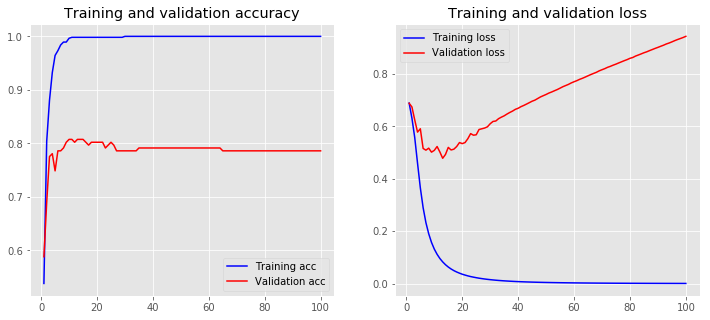

In [14]:
>>> plot_history(history)

You can see that we have trained our model for too long since the training set reached 100% accuracy. A good way to see when the model starts overfitting is when the loss of the validation data starts rising again. This tends to be a good point to stop the model. You can see this around 20-40 epochs in this training.



Note: When training neural networks, you should use a separate testing and validation set. What you would usually do is take the model with the highest validation accuracy and then test the model with the testing set.

This makes sure that you don’t overfit the model. Using the validation set to choose the best model is a form of data leakage (or “cheating”) to get to pick the result that produced the best test score out of hundreds of them. Data leakage happens when information outside the training data set is used in the model.

In this case, our testing and validation set are the same, since we have a smaller sample size. As we have covered before, (deep) neural networks perform best when you have a very large number of samples. In the next part, you’ll see a different way to represent words as vectors. This is a very exciting and powerful way to work with words where you’ll see how to represent words as dense vectors.

# What Is a Word Embedding?

Text is considered a form of sequence data similar to time series data that you would have in weather data or financial data. In the previous BOW model, you have seen how to represent a whole sequence of words as a single feature vector. Now you will see how to represent each word as vectors. There are various ways to vectorize text, such as:

    Words represented by each word as a vector
    Characters represented by each character as a vector
    N-grams of words/characters represented as a vector (N-grams are overlapping groups of multiple succeeding words/characters in the text)

In this tutorial, you’ll see how to deal with representing words as vectors which is the common way to use text in neural networks. Two possible ways to represent a word as a vector are one-hot encoding and word embeddings.
One-Hot Encoding

The first way to represent a word as a vector is by creating a so-called one-hot encoding, which is simply done by taking a vector of the length of the vocabulary with an entry for each word in the corpus.

In this way, you have for each word, given it has a spot in the vocabulary, a vector with zeros everywhere except for the corresponding spot for the word which is set to one. As you might imagine, this can become a fairly large vector for each word and it does not give any additional information like the relationship between words.

Let’s say you have a list of cities as in the following example:

In [15]:
>>> cities = ['London', 'Berlin', 'Berlin', 'New York', 'London']
>>> cities

['London', 'Berlin', 'Berlin', 'New York', 'London']

You can use scikit-learn and the LabelEncoder to encode the list of cities into categorical integer values like here:

In [16]:
>>> from sklearn.preprocessing import LabelEncoder

>>> encoder = LabelEncoder()
>>> city_labels = encoder.fit_transform(cities)
>>> city_labels

array([1, 0, 0, 2, 1], dtype=int64)

Using this representation, you can use the OneHotEncoder provided by scikit-learn to encode the categorical values we got before into a one-hot encoded numeric array. OneHotEncoder expects each categorical value to be in a separate row, so you’ll need to reshape the array, then you can apply the enco

In [17]:
>>> from sklearn.preprocessing import OneHotEncoder

>>> encoder = OneHotEncoder(sparse=False)
>>> city_labels = city_labels.reshape((5, 1))
>>> encoder.fit_transform(city_labels)

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

You can see that categorical integer value represents the position of the array which is 1 and the rest is 0. This is often used when you have a categorical feature which you cannot represent as a numeric value but you still want to be able to use it in machine learning. One use case for this encoding is of course words in a text but it is most prominently used for categories. Such categories can be for example city, department, or other categories.

## Word Embeddings

This method represents words as dense word vectors (also called word embeddings) which are trained unlike the one-hot encoding which are hardcoded. This means that the word embeddings collect more information into fewer dimensions.

Note that the word embeddings do not understand the text as a human would, but they rather map the statistical structure of the language used in the corpus. Their aim is to map semantic meaning into a geometric space. This geometric space is then called the embedding space.

This would map semantically similar words close on the embedding space like numbers or colors. If the embedding captures the relationship between words well, things like vector arithmetic should become possible. A famous example in this field of study is the ability to map King - Man + Woman = Queen.

How can you get such a word embedding? You have two options for this. One way is to train your word embeddings during the training of your neural network. The other way is by using pretrained word embeddings which you can directly use in your model. There you have the option to either leave these word embeddings unchanged during training or you train them also. 

How can you get such a word embedding? You have two options for this. One way is to train your word embeddings during the training of your neural network. The other way is by using pretrained word embeddings which you can directly use in your model. There you have the option to either leave these word embeddings unchanged during training or you train them also. 
Now you need to tokenize the data into a format that can be used by the word embeddings. Keras offers a couple of convenience methods for text preprocessing and sequence preprocessing which you can employ to prepare your text.

You can start by using the Tokenizer utility class which can vectorize a text corpus into a list of integers. Each integer maps to a value in a dictionary that encodes the entire corpus, with the keys in the dictionary being the vocabulary terms themselves. You can add the parameter num_words, which is responsible for setting the size of the vocabulary. The most common num_words words will be then kept. I have the testing and training data prepared from the previous example:


In [18]:
>>> from keras.preprocessing.text import Tokenizer

>>> tokenizer = Tokenizer(num_words=5000)
>>> tokenizer.fit_on_texts(sentences_train)

>>> X_train = tokenizer.texts_to_sequences(sentences_train)
>>> X_test = tokenizer.texts_to_sequences(sentences_test)

>>> vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

>>> print(sentences_train[2])
>>> print(X_train[2])

I am a fan of his ... This movie sucked really bad.  
[7, 150, 2, 932, 4, 49, 6, 11, 563, 45, 30]


The indexing is ordered after the most common words in the text, which you can see by the word the having the index 1. It is important to note that the index 0 is reserved and is not assigned to any word. This zero index is used for padding, which I’ll introduce in a moment.

Unknown words (words that are not in the vocabulary) are denoted in Keras with word_count + 1 since they can also hold some information. You can see the index of each word by taking a look at the word_index dictionary of the Tokenizer object:


In [19]:
for word in ['the', 'all']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 27




**Note**: Pay close attention to the difference between this technique and the X_train that was produced by scikit-learn’s CountVectorizer.

With CountVectorizer, we had stacked vectors of word counts, and each vector was the same length (the size of the total corpus vocabulary). With Tokenizer, the resulting vectors equal the length of each text, and the numbers don’t denote counts, but rather correspond to the word values from the dictionary tokenizer.word_index.

One problem that we have is that each text sequence has in most cases different length of words. To counter this, you can use pad_sequence() which simply pads the sequence of words with zeros. By default, it prepends zeros but we want to append them. Typically it does not matter whether you prepend or append zeros.

Additionally you would want to add a maxlen parameter to specify how long the sequences should be. This cuts sequences that exceed that number. In the following code, you can see how to pad sequences with Keras:

In [20]:
>>> from keras.preprocessing.sequence import pad_sequences
>>> maxlen = 100
>>> X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
>>> X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
>>> print(X_train[0, :])

[170 116 390  35   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


The first values represent the index in the vocabulary as you have learned from the previous examples. You can also see that the resulting feature vector contains mostly zeros, since you have a fairly short sentence. In the next part you will see how to work with word embeddings in Keras.

In [ ]:
import nltk
import gensim
from nltk.corpus import abc

model= gensim.models.Word2Vec(abc.sents())
X= list(model.wv.vocab)
data=model.most_similar('science')
print(data)